<a href="https://colab.research.google.com/github/qTronor/AI-Model-Playground/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
df_train = pd.read_csv('//content/drive/MyDrive/AI_Datasets/Innopolis/Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Можно предположить что PassengerId и Ticket не влияют на выживаемость

# EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,4,644


In [8]:
duplicates = df_train.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 0


In [9]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


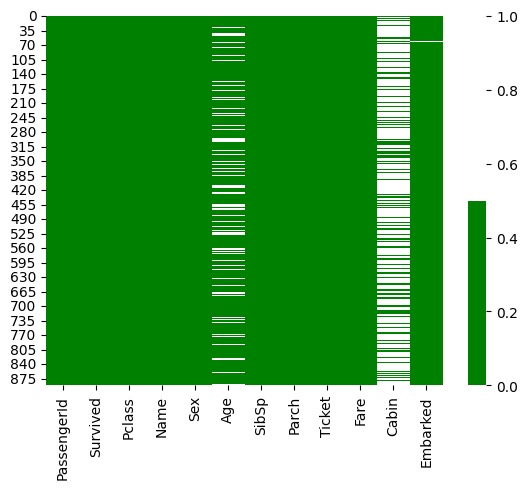

In [10]:
colors = ['green', 'white']
sns.heatmap(df_train.isna(), cmap = sns.color_palette(colors))
plt.show()

In [11]:
for column in df_train.columns:
  missing = np.mean(df_train[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 PassengerId : 0.0%
 Survived : 0.0%
 Pclass : 0.0%
 Name : 0.0%
 Sex : 0.0%
 Age : 19.9%
 SibSp : 0.0%
 Parch : 0.0%
 Ticket : 0.0%
 Fare : 0.0%
 Cabin : 77.1%
 Embarked : 0.2%


Необходимо будет обработать пустые значения, возраст заполнить, а каюту преобразовать в наличие или отсутствие

In [12]:
df_train.Survived.value_counts()

,count
Survived,
0,549
1,342


In [13]:
df_train.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


## Пол и класс

In [14]:
grouped_by_sex = df_train.groupby(['Sex', 'Survived'])['Survived'].count()
print(grouped_by_sex)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [15]:
male_counts = grouped_by_sex['male']
female_counts = grouped_by_sex['female']

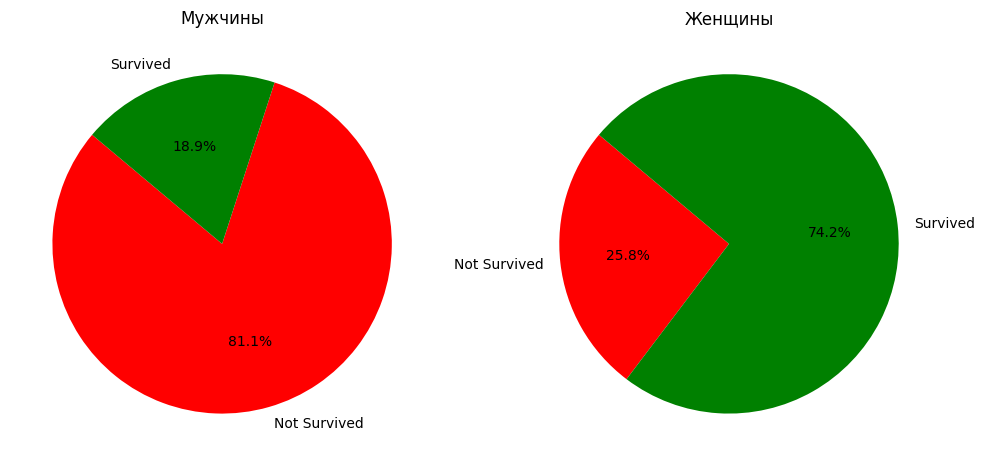

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(
    male_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('Мужчины')

plt.subplot(1, 2, 2)
plt.pie(
    female_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('Женщины')

plt.tight_layout()
plt.show()

Можно заметить что выжило примерно 74 процента женщин и 18 процентов мужчин, пол влиял на выживаемость пассажиров

In [17]:
grouped_by_pclass = df_train.groupby(['Pclass', 'Survived'])['Survived'].count()
print(grouped_by_pclass)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


In [18]:
first_counts = grouped_by_pclass[1]
second_counts = grouped_by_pclass[2]
third_counts = grouped_by_pclass[3]

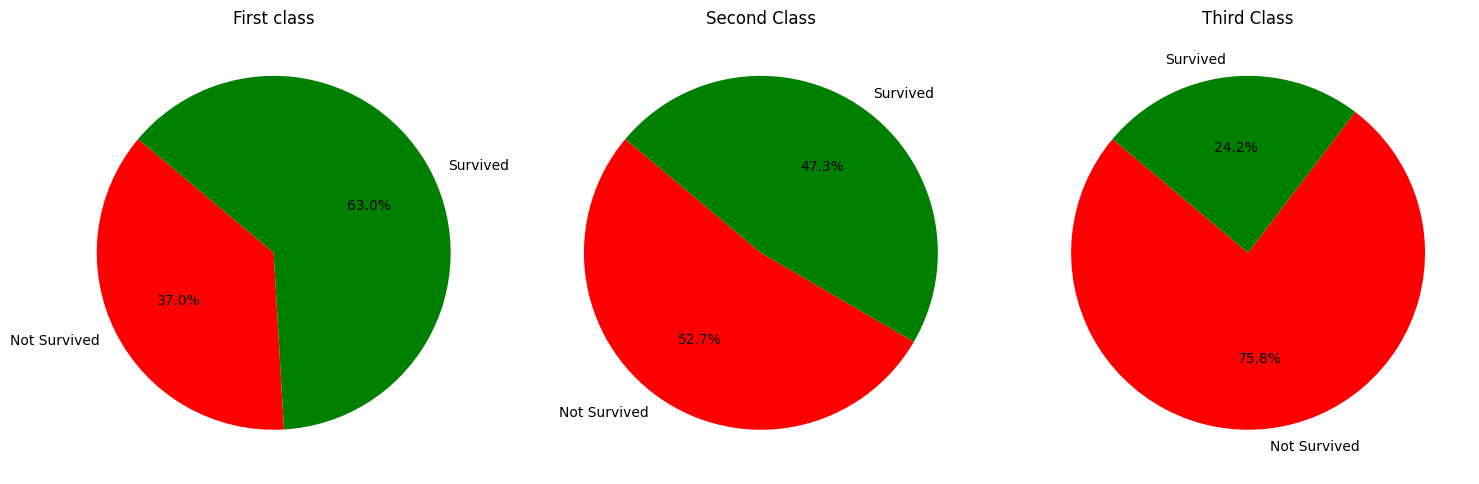

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(
    first_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('First class')

plt.subplot(1, 3, 2)
plt.pie(
    second_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('Second Class')

plt.subplot(1, 3, 3)
plt.pie(
    third_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('Third Class')

plt.tight_layout()
plt.show()

Номер класса влиял на выживаемость, так как 63% пассажиров 1го класса смогли выжить, в то время как в 3м классе спаслось только 24%. Можно вспомнить что 1й классе обычно находится в верхней части корабля в отличии от 3го класа

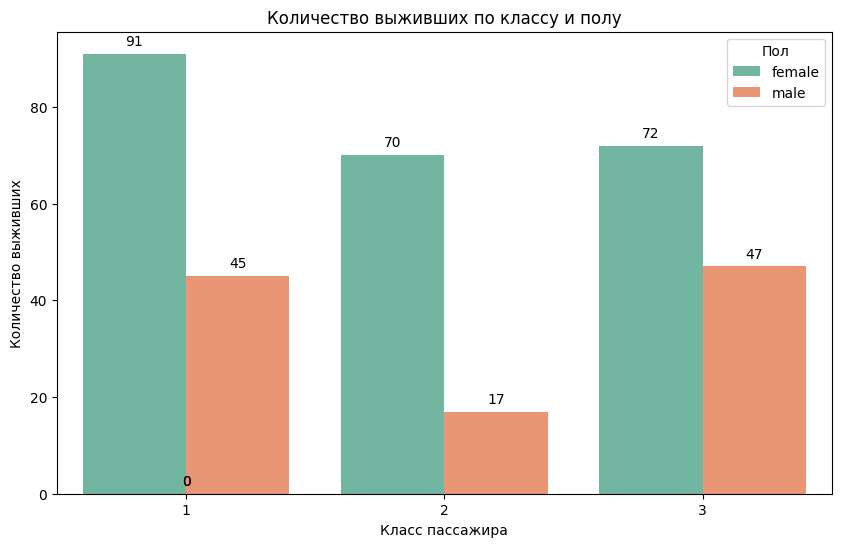

In [20]:
survived_counts = df_train[df_train['Survived'] == 1].groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=survived_counts,
    x='Pclass',
    y='Count',
    hue='Sex',
    palette='Set2'
)
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

plt.xlabel('Класс пассажира')
plt.ylabel('Количество выживших')
plt.title('Количество выживших по классу и полу')
plt.legend(title='Пол')

plt.show()

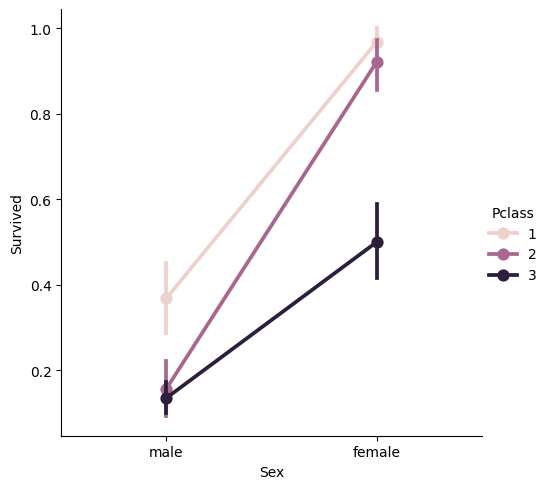

In [21]:
sns.catplot(x='Sex', y='Survived', hue='Pclass',  data=df_train, kind="point")

Женщины 1го и 2го классов имели более 80% шансов на спасение, мужчины 2го и 3го классов выживали имели около 20% и менее шансов на спасение

## Порт

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_train.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [24]:
df_train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

<Axes: >

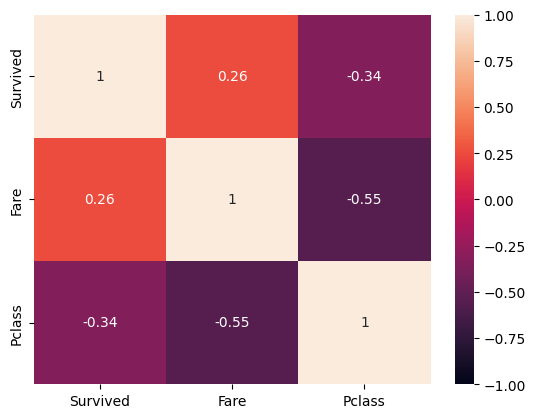

In [25]:
sns.heatmap(df_train[['Survived', 'Fare', 'Pclass']].corr(), annot=True, vmin=-1, vmax=1)

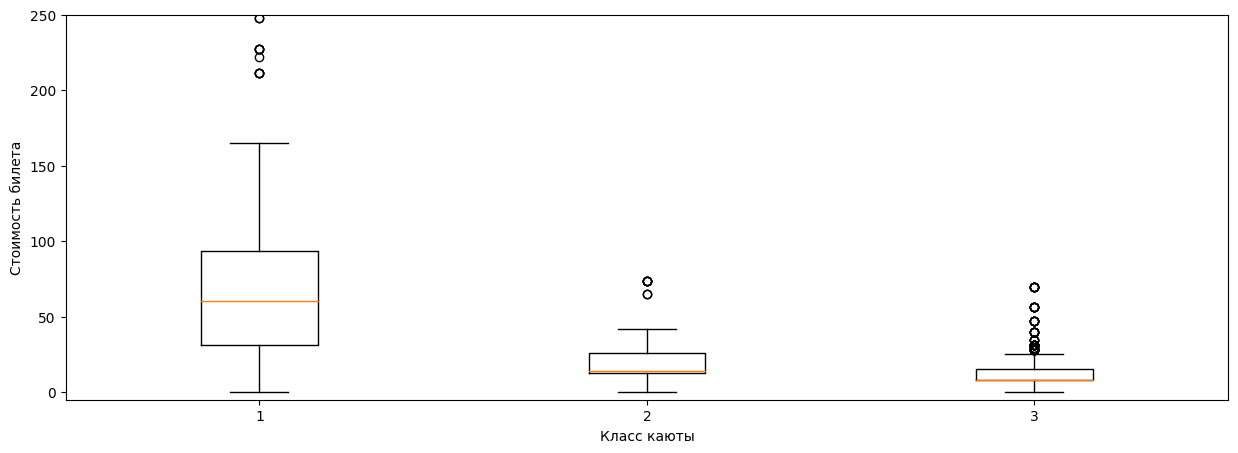

In [26]:
fares = dict.fromkeys((1,2,3), [])
for i, price in enumerate(df_train.Fare):
    fares[df_train.Pclass[i]] = fares[df_train.Pclass[i]] + [price]


fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(fares.values(), labels=(1,2,3), vert=True)
ax.set_ylabel('Стоимость билета')
ax.set_xlabel('Класс каюты')
ax.set_ylim(-5, 250)
plt.show()

In [74]:
for i, fare in enumerate(df_train.Fare):
    if np.isclose(fare, .0):
        df_train.loc[i, 'Fare'] = np.median(fares[df_train.loc[i, 'Pclass']])

In [75]:
df_train.loc[pd.isna(df_train.Embarked), 'Embarked'] = 'S'

<ipython-input-29-62471103ea4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


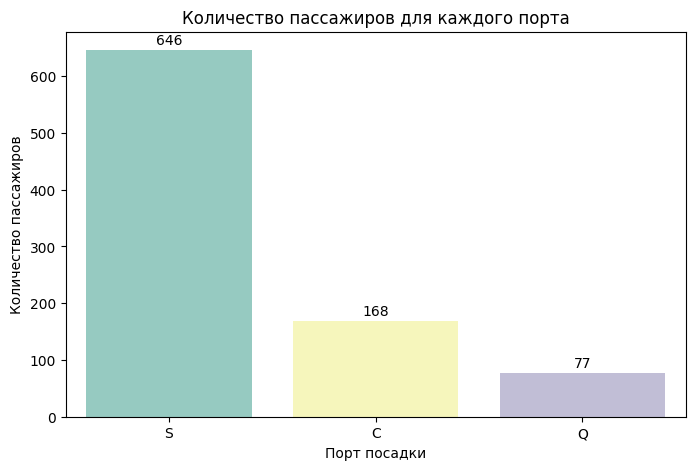

In [29]:
port_counts = df_train['Embarked'].value_counts().reset_index()
port_counts.columns = ['Port', 'Count']

plt.figure(figsize=(8, 5))

barplot = sns.barplot(
    data=port_counts,
    x='Port',
    y='Count',
    palette='Set3'
)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 7),
        textcoords='offset points'
    )

plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров для каждого порта')
plt.show()

Титаник следовал по маршруту Southampton—Cherbourg—Queenstown-New York.
 Southampton (Англия) был первым пунктом назначения и как видно на графике принял большую часть пассажиров. Далее следовали Cherbourg во Франции и Queenstown в Ирландии.

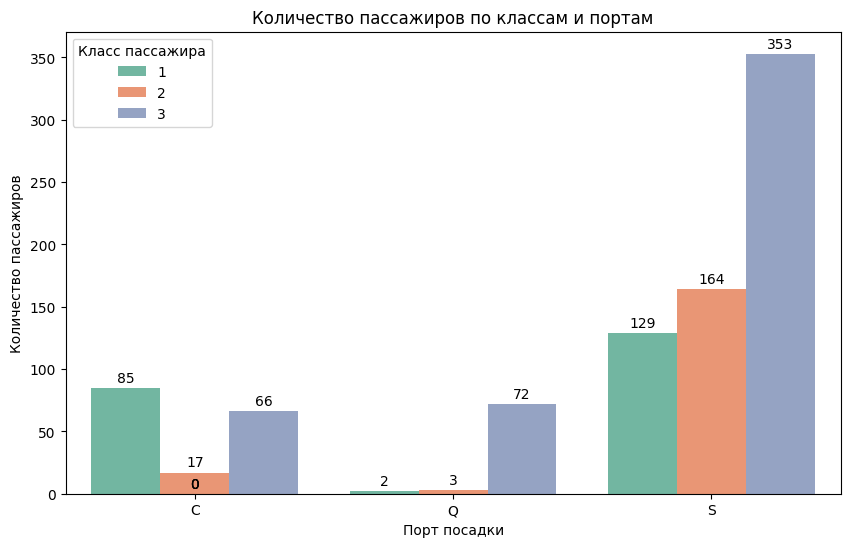

In [30]:
class_port_counts = df_train.groupby(['Pclass', 'Embarked']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=class_port_counts,
    x='Embarked',
    y='Count',
    hue='Pclass',
    palette='Set2'
)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 7),
        textcoords='offset points'
    )

plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам и портам')
plt.legend(title='Класс пассажира')

plt.show()

В Southampton, как первом порту на пути следования, Титаник принял наибольшее колво пассажиров, в особенности пассажиров 3го и 2го классов. В Cherbourg (Франция), результаты уже немного другие, колво пассажиров 1го класса севших на борт превышает колво пассажиров 3го класса, это можно связать миграцией бедных слоев населения (3й класс на Титанике) из Англии на запад, а также с тем что порт во Франции мог собрать большое количество богатых людей из Европы.
В Ирландии на борт взошло сравнительно больше количество людей 3го класса и 5 человек 1го и 2го класса, возможно это связано с самой Ирландией как небогатым районом и сильной исторической миграцией людей в Америку.


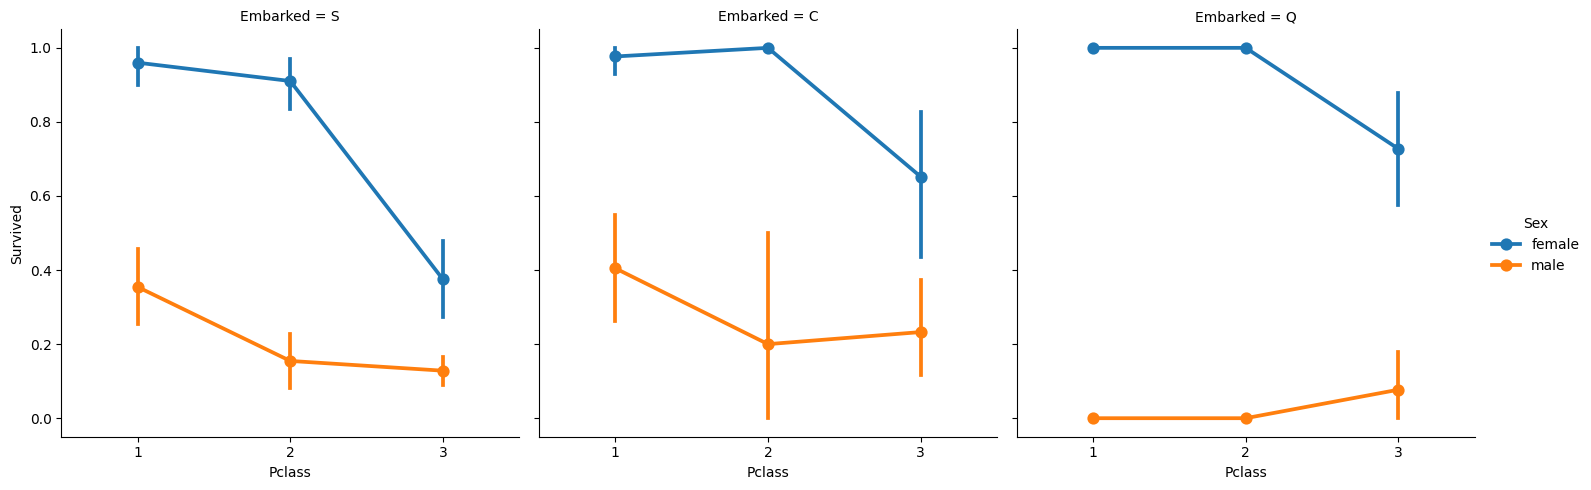

In [31]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked',  data=df_train, kind="point")

Судя по графикам, можно сказать что у женщин 3го класса севших на борт в Саутгемптоне шансы выжить были ниже чем у тех, кто сел в других 2х портах. Для мужчин всех классов шансы выжить были низкие, однако у тех кто взашел на борт в Саутгемптоне и Шербуре, они были выше по сравнению с Квинстауном.

## Возраст и имя

Text(0, 0.5, 'Кол-вол выживших')

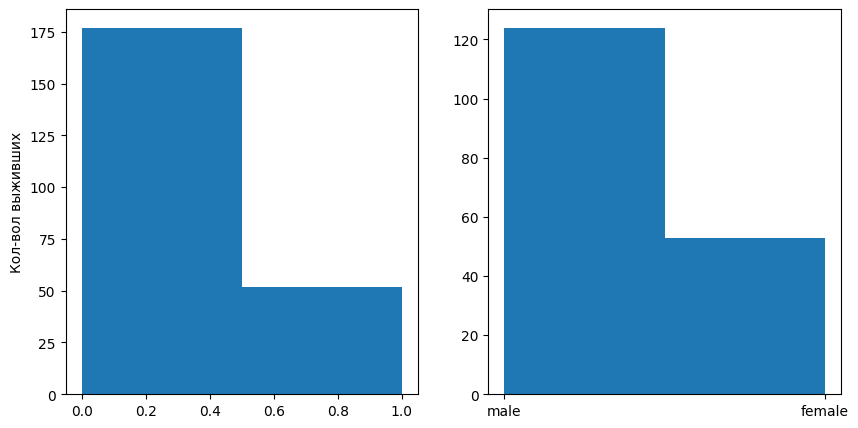

In [32]:
noage = df_train.loc[(pd.isna(df_train['Age']))]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(noage.Survived, bins=2, cumulative=-1)
ax[1].hist(noage.Sex, bins=2)
ax[0].set_ylabel('Кол-вол выживших')

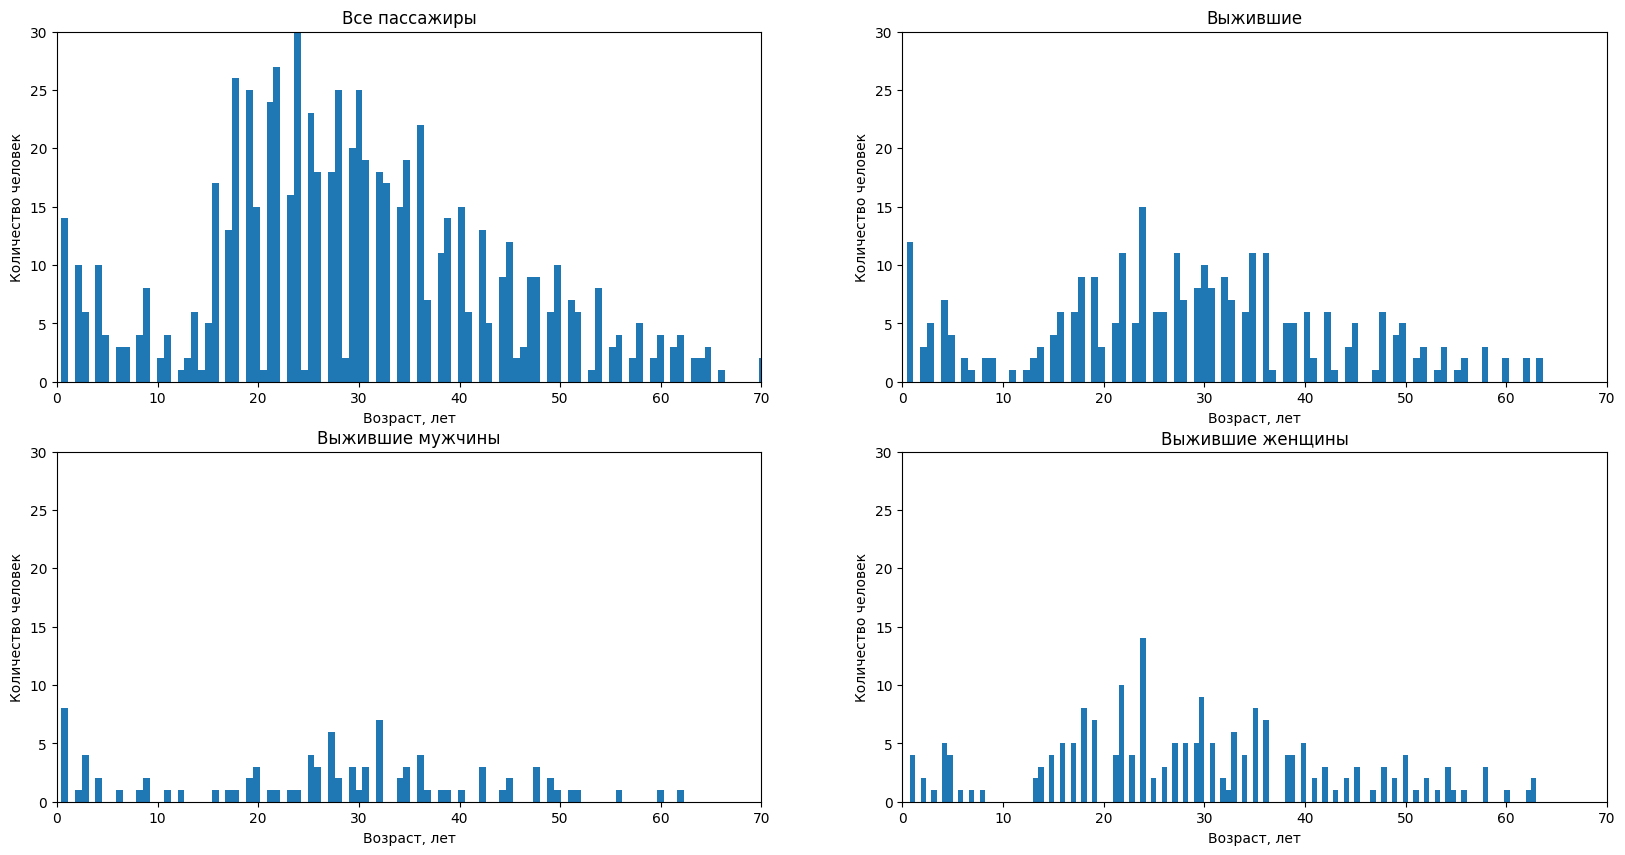

In [33]:
survivors = df_train.loc[(df_train['Survived'] == 1)]
male_survivors = df_train.loc[((df_train['Sex'] == 'male') & (df_train['Survived'] == 1))]
female_survivors = df_train.loc[((df_train['Sex'] == 'female') & (df_train['Survived'] == 1))]

num_of_ages = len(dict(Counter(survivors['Age'])).keys())

fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[df_train, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

In [34]:
children = df_train.loc[((df_train['Age'] < np.float64(18.0)) & (df_train['Age'] > 0))]
survivors_children = df_train.loc[((df_train['Age'] < np.float64(18.0)) & (df_train['Survived'] == 1) & (df_train['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 53.98%


In [35]:
df_train["Name"]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


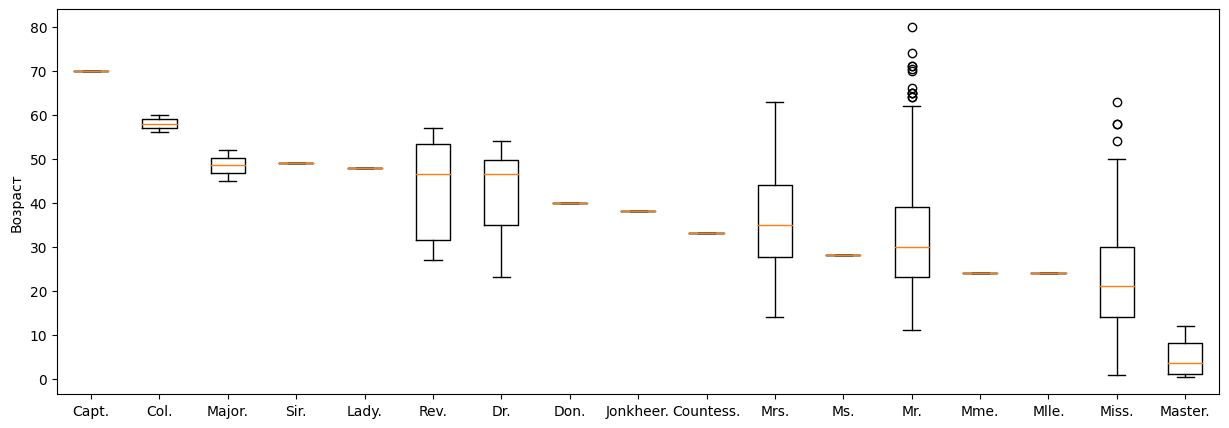

In [36]:
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

titled_names = []
for name in df_train.Name:
    for title in titles:
        if title in name.split(' '):
            titled_names.append(title)
            break


df_train.insert(12, 'Title', titled_names)

ages = dict.fromkeys(titles, [])
for i, title in enumerate(df_train.Title):
    if not pd.isna(df_train.Age[i]):
        ages[title] = ages[title] + [df_train.Age[i]]

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('Возраст')
plt.show()

In [37]:
for i, age in enumerate(df_train.Age):
    if pd.isna(age):
        df_train.loc[i, 'Age'] = np.median(ages[df_train.loc[i, 'Title']])

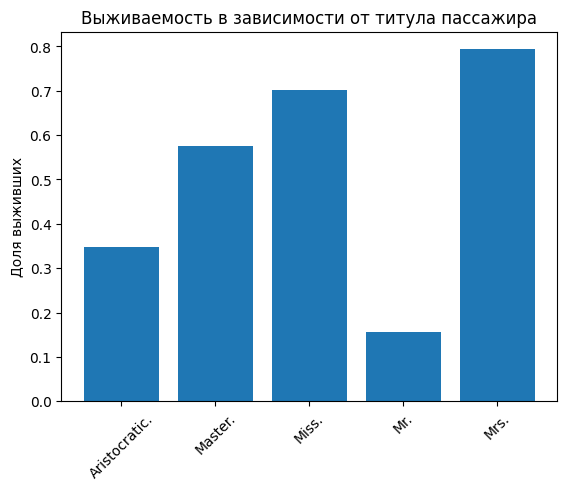

In [38]:
# Define title groups
aristocratic = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.")
mrs = ("Ms.")
miss = ("Mlle.", 'Mme.')

# Map titles to their categories
df_train['Title'] = df_train['Title'].apply(lambda title: 'Aristocratic.' if title in aristocratic
                                            else 'Miss.' if title in miss
                                            else 'Mrs.' if title in mrs
                                            else title)

# Calculate survival percentage for each title
title_survive_percent = df_train.groupby('Title')['Survived'].mean()

# Plot the survival percentage by title
fig, ax = plt.subplots()
ax.bar(title_survive_percent.index, title_survive_percent.values)
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от титула пассажира')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Титул имеет вес для вероятности выжить

In [39]:
df_train = df_train.join(pd.get_dummies(df_train.Embarked, prefix='Emb'))

## Каюта

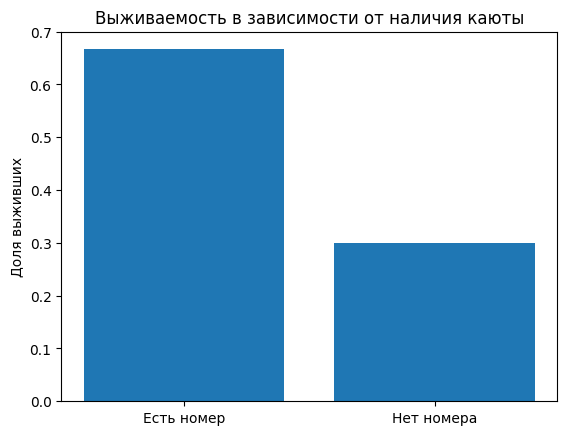

In [40]:
have_cabin = df_train.loc[(pd.notna(df_train['Cabin']))]
have_cabin_survived = df_train.loc[((pd.notna(df_train['Cabin'])) & (df_train['Survived'] == 1))]
no_cabin = df_train.loc[(pd.isna(df_train['Cabin']))]
no_cabin_survived = df_train.loc[((pd.isna(df_train['Cabin'])) & (df_train['Survived'] == 1))]

fig, ax = plt.subplots()
ax.bar(('Есть номер', 'Нет номера'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от наличия каюты')
plt.show()

In [41]:
df_train['Have_Cabin'] = pd.notna(df_train.Cabin)

## Родственники

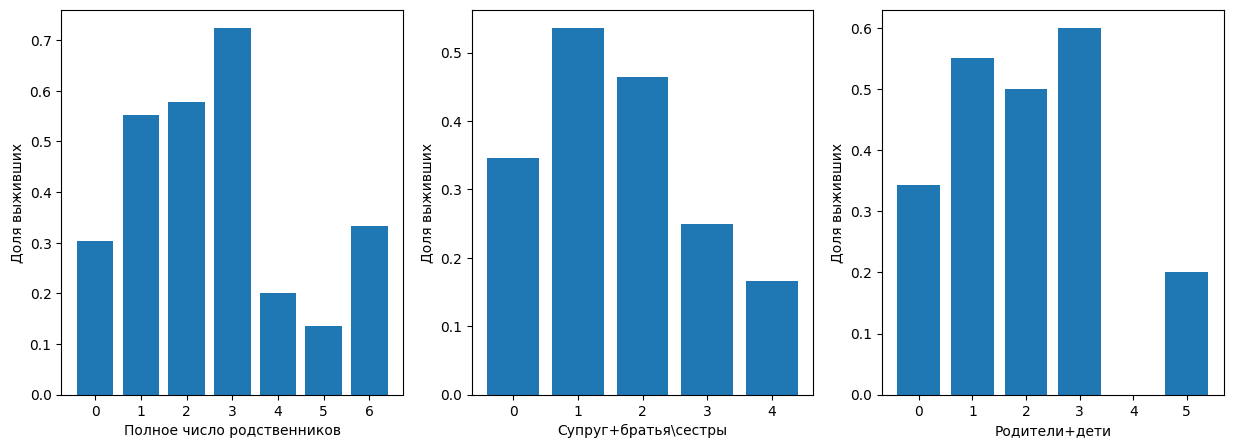

In [42]:
df_train.insert(13, 'Family', np.array(df_train.SibSp, int) + np.array(df_train.Parch, int))

sibsp_total = dict(Counter(df_train.SibSp))
parch_total = dict(Counter(df_train.Parch))
family_total = dict(Counter(df_train.Family))
sibsp_survived = dict(Counter(df_train.loc[(df_train['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(df_train.loc[(df_train['Survived'] == 1)].Parch))
family_survived = dict(Counter(df_train.loc[(df_train['Survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
xlabs = ('Полное число родственников', 'Супруг+братья\сестры', 'Родители+дети')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()

In [43]:
is_alone = []
for fam in df_train.Family:
    if fam == 0:
        is_alone.append(1)
    else:
        is_alone.append(0)
df_train.insert(14, 'is_alone', is_alone)

<Axes: >

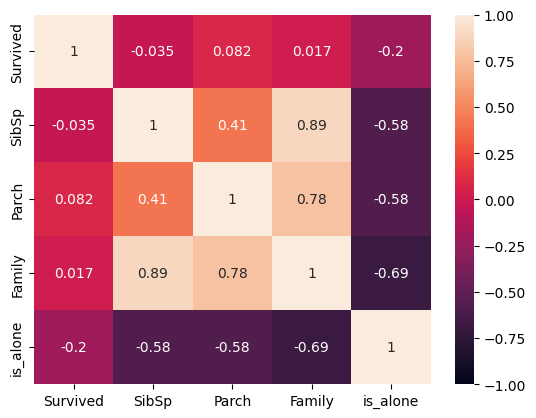

In [44]:
sns.heatmap(df_train[['Survived', 'SibSp', 'Parch', 'Family', 'is_alone']].corr(), annot=True, vmin=-1, vmax=1)

In [45]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family',
       'is_alone', 'Emb_C', 'Emb_Q', 'Emb_S', 'Have_Cabin'],
      dtype='object')

В результате обзора можно отобрать следующие признаки: 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'. Также используя информацию из оставшихся создать новые признаки, такие как 'is_alone', 'have_cabin', 'Family', 'Title' и 'have_age'

Title и Embarked можно закодировать

# Отбор признаков для всего датасета

In [46]:
TITLES = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.",
          "Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.", "Dona.")
ARISTOCRATIC = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.", 'Dona')
MRS = ("Ms.")
MISS = ("Mlle.", 'Mme.')

In [47]:
datasets = []
for file in ("train", "test"):
  df = pd.read_csv(f'//content/drive/MyDrive/AI_Datasets/Innopolis/Titanic/{file}.csv')

  # Sex
  df = df.replace({'male': 0, 'female' : 1})
  # Плата за проезд
  df.Fare.fillna(0, inplace = True)
  fares = dict.fromkeys((1,2,3), [])
  for i, price in enumerate(df.Fare):
        fares[df.Pclass[i]] = fares[df.Pclass[i]] + [price]
  for i, fare in enumerate(df.Fare):
    if np.isclose(fare, .0):
      df.loc[i, 'Fare'] = np.median(fares[df.Pclass[i]])

  titled_names = []
  for name in df.loc[:, 'Name']:
      for title in TITLES:
          if title in name.split(' '):
              titled_names.append(title)
              break

  df.insert(1, 'Title', titled_names)

  ages = dict.fromkeys(TITLES, [])
  for i, title in enumerate(df.Title):
      if not pd.isna(df.Age[i]):
          ages[title] = ages[title] + [df.Age[i]]

  df['Family'] = df.Parch + df.SibSp

  df['Is_Alone'] = df.Family == 0
  df['Have_Cabin'] = pd.notna(df.Cabin)
  df['Have_age'] = pd.notna(df.Age)
  df = df.replace({True: 1, False: 0})

  for i, age in enumerate(df.loc[:, 'Age']):
    if pd.isna(age):
      df.loc[i, 'Age'] = np.median(ages[df.Title[i]])

  # Embarked
  df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
  df = df.join(pd.get_dummies(df.Embarked, prefix='Emb'))

  df = df.drop(columns=['Title', 'Ticket', 'Name', 'SibSp', 'Parch', 'Cabin', 'Title', 'Embarked'])

  datasets.append(df)


<ipython-input-47-9fb5b0fcbd1c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'male': 0, 'female' : 1})
<ipython-input-47-9fb5b0fcbd1c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Fare.fillna(0, inplace = True)
<ipython-input-47-9fb5b0fcbd1c>:35: FutureWarning: Downcastin

In [48]:
datasets[0].head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family,Is_Alone,Have_Cabin,Have_age,Emb_C,Emb_Q,Emb_S
0,1,0,3,0,22.0,7.2500,1,0,0,1,False,False,True
1,2,1,1,1,38.0,71.2833,1,0,1,1,True,False,False
2,3,1,3,1,26.0,7.9250,0,1,0,1,False,False,True
3,4,1,1,1,35.0,53.1000,1,0,1,1,False,False,True
4,5,0,3,0,35.0,8.0500,0,1,0,1,False,False,True


# Данные

In [49]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [50]:
X = datasets[0].drop("Survived", axis = 1)
Y = datasets[0].Survived

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

# Лог регрессия

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)

print (str(acc_log_reg) + ' percent')

79.94 percent


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [54]:
from sklearn.svm import SVC, LinearSVC

In [55]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

65.17


# Дерево решений

In [56]:
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [57]:
# Предсказание на тренировочных данных
y_train_pred = dt_clf_2d.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = dt_clf_2d.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       393
           1       0.86      0.63      0.72       230

    accuracy                           0.82       623
   macro avg       0.83      0.78      0.80       623
weighted avg       0.83      0.82      0.82       623

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       156
           1       0.89      0.66      0.76       112

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.84      0.82      0.82       268



In [58]:
X_valid = datasets[1]

In [59]:
# Предсказание на тестовых данных
y_pred = dt_clf_2d.predict(X_valid)

# Random Forest

In [64]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=3,
    max_features='sqrt',
    random_state=42
)
rf_clf_2d.fit(X_train, y_train)

y_train_pred_random_forest = rf_clf_2d.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred_random_forest))

y_test_pred_random_forest = rf_clf_2d.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       393
           1       0.88      0.63      0.73       230

    accuracy                           0.83       623
   macro avg       0.85      0.79      0.80       623
weighted avg       0.84      0.83      0.82       623

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       156
           1       0.89      0.69      0.77       112

    accuracy                           0.83       268
   macro avg       0.85      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268



In [66]:
param_grid = {
    'n_estimators': [50, 100, 200, 500, 700],
    'max_depth': [1, 3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf_2d, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

Fitting 3 folds for each of 225 candidates, totalling 675 fits
Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [67]:
best_rf_classifier = grid_search.best_estimator_

y_pred_best = best_rf_classifier.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность модели с лучшими параметрами: {best_accuracy:.2f}")

Точность модели с лучшими параметрами: 0.82


In [68]:
y_test_pred_rf_best = best_rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred_rf_best))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       156
           1       0.86      0.70      0.77       112

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



In [69]:
test_prediction = best_rf_classifier.predict(datasets[1])

In [70]:
predictions_series = pd.Series(test_prediction)

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)

print (acc_knn)

78.17


# SGD

In [62]:
from sklearn.linear_model import SGDClassifier

In [63]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

37.08


# Submission

In [71]:
result_df = pd.DataFrame({
    'PassengerId': datasets[1]['PassengerId'],
    'Survived': predictions_series
})

result_df.to_csv('predictions_output.csv', index=False)

In [72]:
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


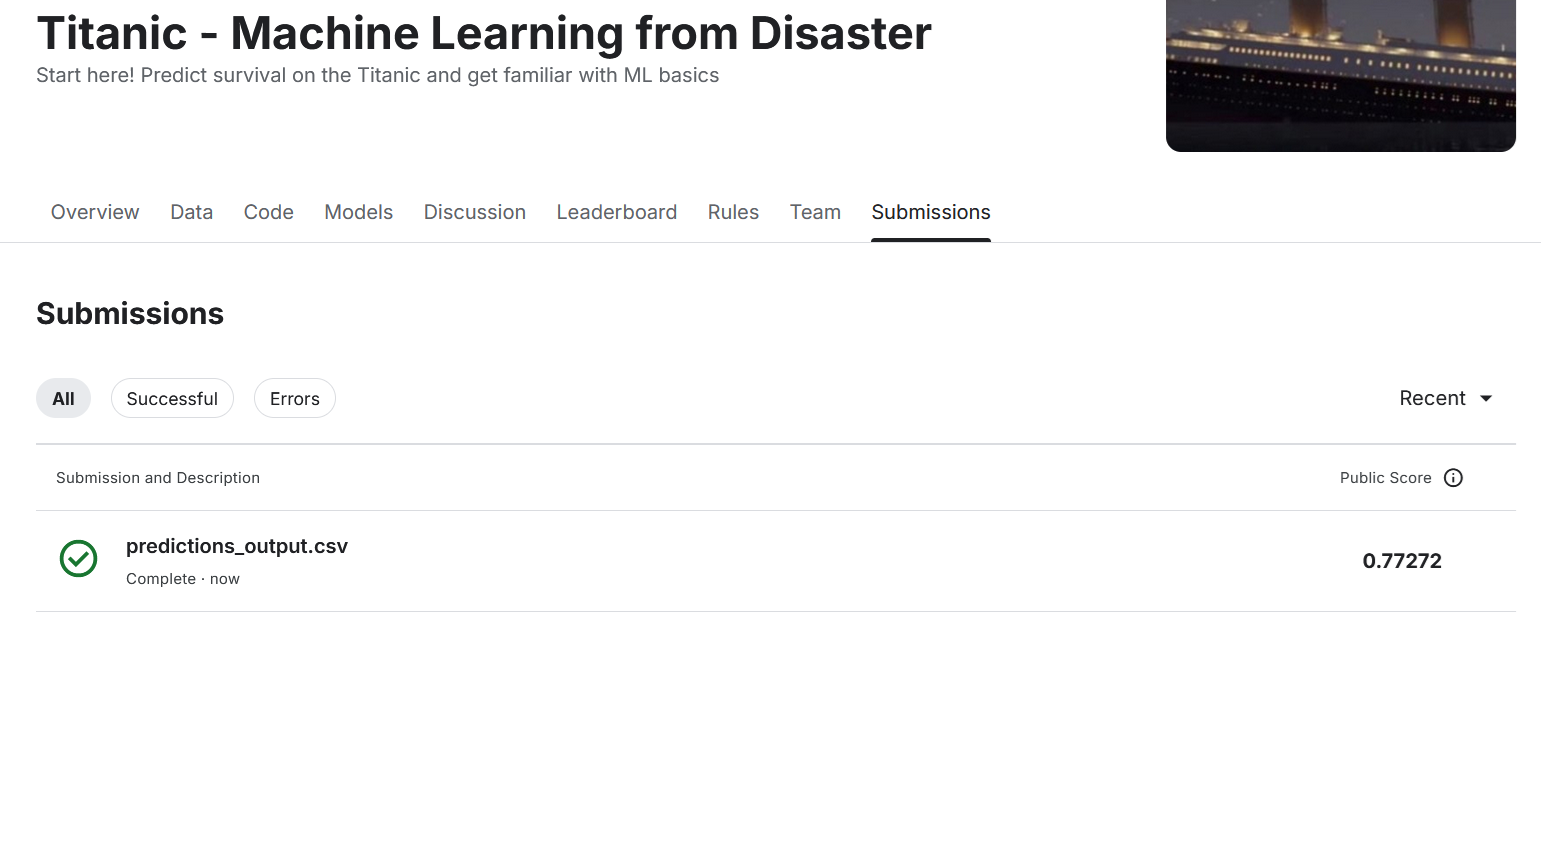

Пока результат такой, я, конечно, попробую другие модели и параметры, но позже